In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv(r'C:\Users\saura\Desktop\Modular\ML_Live_Class-\data\Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='total_spent', ylabel='sales'>

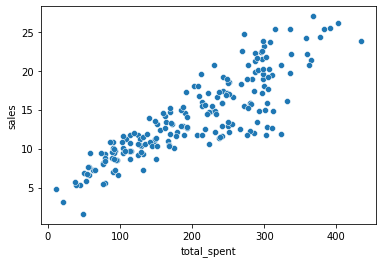

In [88]:
df['total_spent'] = df['TV'] + df['radio'] + df['newspaper']
sns.scatterplot(data=df, x='total_spent', y='sales')

<AxesSubplot:xlabel='total_spent', ylabel='sales'>

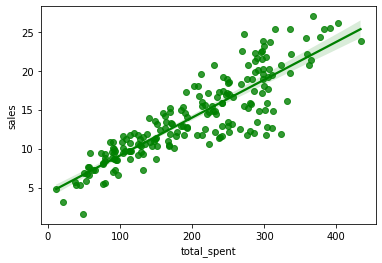

In [89]:
sns.regplot(data=df, x='total_spent', y='sales', color='g') #seaborn is able to draw a regression line using OLS

In [62]:
x = df
x.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [63]:
y = df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model=LinearRegression()

In [67]:
model.fit(X_train, y_train)

LinearRegression()

In [68]:
test_pred = model.predict(X_test)
test_pred

array([14.7, 19.8, 11.9, 16.7,  9.5,  6.6, 20.2, 17. , 10.3, 20.1, 10.9,
       14.1, 11.5, 23.7, 19.2, 10.1, 12. ,  9.5,  8.4, 21.5,  7.6, 19. ,
       27. , 24.2,  9.3, 11.4, 20.7,  9.7, 12.6,  9.3,  9.2, 19.6, 11.2,
        5.6, 17.1,  9.6, 10.6,  9.7,  7.3, 10.5, 12.5, 10.3, 11.4,  7. ,
       11.8, 11.3,  5.3, 14.8, 12.9, 22.4, 10.4, 12.9, 14.8, 11.9, 10.6,
        3.2, 25.4, 10.8, 17.4, 14.9, 15.2, 26.2,  8.8, 21.2, 11.7, 22.2])

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
mean_absolute_error(y_test, test_pred )

3.942973893517223e-15

In [71]:
mean_squared_error(y_test, test_pred)

2.5924837930672345e-29

In [72]:
np.sqrt(mean_squared_error(y_test, test_pred))

5.091643932039273e-15

In [73]:

test_residuals = y_test - test_pred
test_residuals

37    -5.329071e-15
109    7.105427e-15
31    -3.552714e-15
89    -3.552714e-15
66    -5.329071e-15
           ...     
183    3.552714e-15
127   -1.776357e-15
53    -3.552714e-15
100    0.000000e+00
93     0.000000e+00
Name: sales, Length: 66, dtype: float64

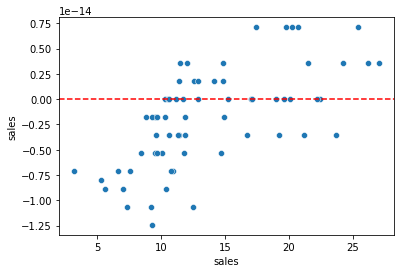

In [74]:
sns.scatterplot(x=y_test, y= test_residuals) #residual plot
plt.axhline(y=0, color='red', ls='--')

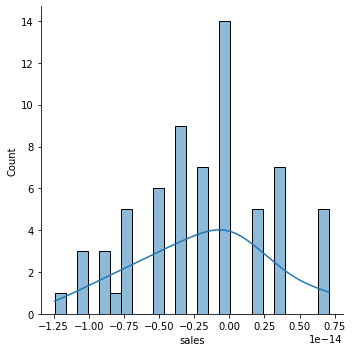

In [75]:
sns.displot(test_residuals, bins=25, kde=True)

TypeError: len() of unsized object

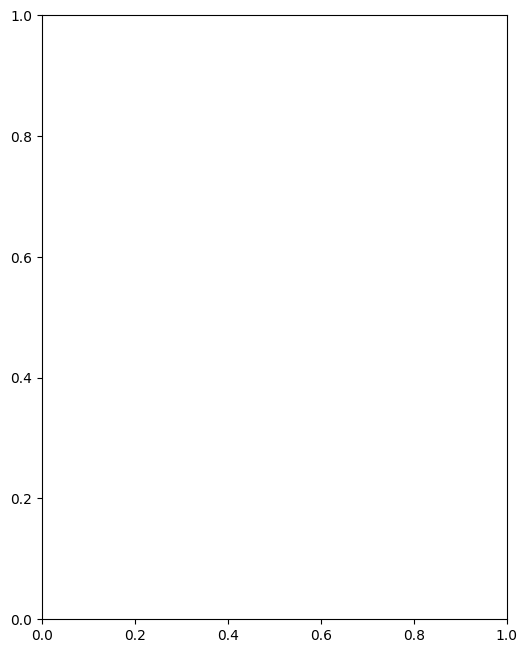

In [90]:
import scipy as sp 
fig, ax =plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_residuals.plot==ax)

In [77]:
model.coef_

array([-2.41212993e-17,  1.11022302e-16,  5.55111512e-17,  1.00000000e+00])

In [78]:
y_hat = model.predict(x)

Text(0.5, 1.0, 'Newspaper Spend')

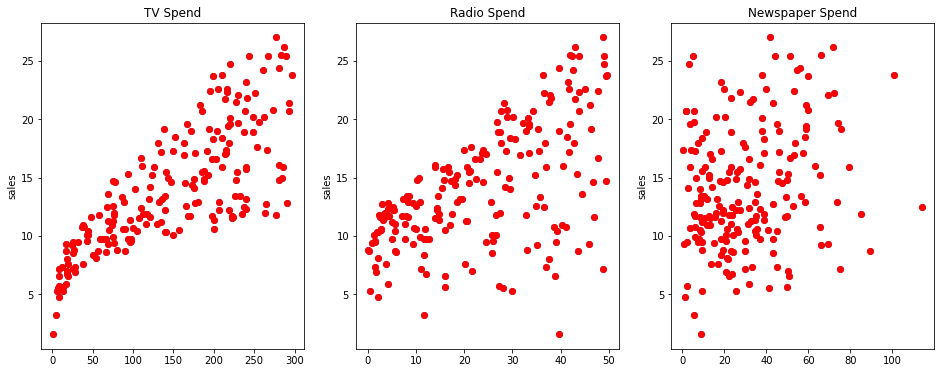

In [91]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel("sales")
axes[0].set_title("TV Spend")


axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_ylabel("sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel("sales")
axes[2].set_title("Newspaper Spend")

In [80]:
from joblib import dump,load #saving your file as a binary file

In [81]:
import os

In [82]:
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)
filepath = os.path.join(model_dir, 'model.joblib')
dump(model, filepath)

['models\\model.joblib']

In [83]:
load_model = load(r'C:\Users\saura\Desktop\Modular\ML_Live_Class-\models\model.joblib')

In [84]:
load_model.coef_

array([-2.41212993e-17,  1.11022302e-16,  5.55111512e-17,  1.00000000e+00])

In [85]:
example = [[151,25,15]]

In [92]:
load_model.predict(example)

C:\Users\saura\anaconda3\envs\mltest1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 4 features as input.

# Polynomial Regression

In [93]:
x1 = df.drop(['sales', 'total_spent'], axis=1)
x1.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [94]:
x1.shape

(200, 3)

In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

In [97]:
poly_conv.fit(x1)

PolynomialFeatures(include_bias=False)

In [98]:
poly_features = poly_conv.transform(x1)

In [99]:
poly_features.shape

(200, 9)

In [100]:
x1.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [101]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    poly_features, y, test_size=0.33, random_state=101)

In [103]:
model1 = LinearRegression()

In [104]:
model1.fit(X_train, y_train)

LinearRegression()

In [105]:
test_pred = model1.predict(X_test)
test_pred

array([13.97204613, 19.31163632, 12.34937446, 16.77918795,  7.86585082,
        6.91555804, 20.11299294, 17.49707854, 10.56626076, 20.12510306,
        9.45653268, 14.08673516, 12.06855682, 23.37172536, 19.67600099,
        9.14838427, 12.13661295,  9.25938961,  8.42727726, 21.64817709,
        7.0207988 , 19.36930318, 27.21526812, 24.54515558,  8.98640103,
       11.86761484, 20.38278449,  9.22102483, 12.76121768,  8.64739673,
        8.67463214, 20.20034879, 10.93174941,  6.85739529, 18.29226844,
        9.5074497 , 10.35219229,  9.64459655,  7.4384789 , 11.03480643,
       12.66080843, 10.69057937, 11.23958513,  7.4725002 , 11.38637684,
       10.2667274 ,  6.12707279, 15.54892762, 13.43339421, 22.70762962,
       10.41887348, 13.24665286, 14.2399427 , 11.85682389, 11.71631169,
        5.5519889 , 25.01544605,  9.5463153 , 17.34861031, 15.7728373 ,
       15.51033662, 25.57307088,  8.60367331, 21.60788857, 12.34127765,
       22.21531611])

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [107]:
MAE = mean_absolute_error(y_test, test_pred)
MAE

0.48428105352155515

In [108]:
MSE = mean_squared_error(y_test, test_pred)
MSE

0.42028148421569356

In [109]:
RMSE = np.sqrt(MSE)
RMSE

0.6482912032533633

In [110]:
model1.coef_

array([ 5.25319441e-02,  1.42773271e-02,  1.47528851e-02, -1.12739168e-04,
        1.13231490e-03, -5.42180033e-05,  6.26813126e-05,  8.93347558e-05,
       -3.52004070e-05])

In [111]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(x1)
    X_train, X_test, y_train, y_test = train_test_split(
                                    poly_features, y, test_size=0.33, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [112]:
train_rmse_errors


[1.737651598244771,
 0.5947926597019145,
 0.44059734232363623,
 0.353291328203811,
 0.24845372122354306,
 0.1884301110144594,
 4.821675561964251,
 0.15539143837464583,
 0.1513304008162878]

In [113]:
test_rmse_errors #overfitting is happening after the 5th degree(error exploding)

[1.5324409426512418,
 0.6482912032533633,
 0.5577254823367401,
 0.5064297300349341,
 2.3573691979064937,
 11.246588079479707,
 1206.0215511132849,
 2874.895487064128,
 174695.32450862604]

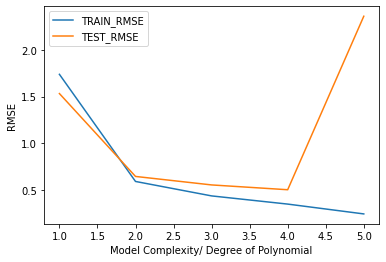

In [114]:
plt.plot(range(1,6), train_rmse_errors[:5], label = 'TRAIN_RMSE') #You will be selecting the 2nd degree polynomial model
plt.plot(range(1,6), test_rmse_errors[:5], label = 'TEST_RMSE')
plt.xlabel("Model Complexity/ Degree of Polynomial")
plt.ylabel("RMSE")
plt.legend()

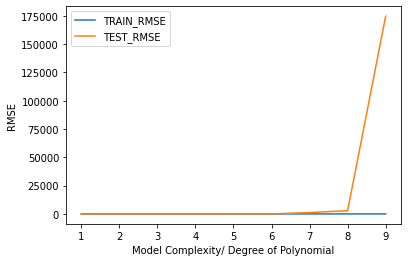

In [115]:
plt.plot(range(1,10), train_rmse_errors, label = 'TRAIN_RMSE')
plt.plot(range(1,10), test_rmse_errors, label = 'TEST_RMSE')
plt.xlabel("Model Complexity/ Degree of Polynomial")
plt.ylabel("RMSE")
plt.legend()

In [116]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [117]:
final_model = LinearRegression()

In [118]:
full_converted_x = final_poly_converter.fit_transform(x)
final_model.fit(full_converted_x, y)

LinearRegression()

In [119]:
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)
filepath = os.path.join(model_dir, 'poly.joblib')
dump(final_model, filepath)

['models\\poly.joblib']

In [ ]:
loaded_converter

In [ ]:
loaded_model